## Boston Housing
### 准备数据

In [2]:
import keras
keras.__version__

'2.3.1'

In [3]:
from keras.datasets import boston_housing
(train_data,train_targets),(test_data,test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 1s 9us/step


In [4]:
train_data.shape,test_data.shape

((404, 13), (102, 13))

### 数据处理

#### 特征标准化

In [7]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean
train_data /= std
test_data -= mean
test_data /= std

### 建构模型

In [8]:
from keras import models
from keras import layers

#  构建对应模型
def build_model():
        model = models.Sequential() 
        model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(1))   # 没有激活函数
        model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])   
        #均方误差（MSE，mean squared error）
        #平均绝对误差（MAE，mean absolute error）
        return model

K-flod验证

In [12]:
# 自写
import numpy as np

k = 4
num_val_samples = len(train_data) // k   # 一折多长
num_epochs = 100   # 100个epoch
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]  # 验证集data
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples] # 验证集target
    
    partial_train_data = np.concatenate( [train_data[:i * num_val_samples]      # 训练数据data
                                          ,train_data[(i + 1) * num_val_samples:]]
                                          , axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples] # 训练数据target
                                            ,train_targets[(i + 1) * num_val_samples:]]
                                            , axis=0)
    
    model = build_model() 
    model.fit(partial_train_data
              , partial_train_targets
              ,epochs=num_epochs
              , batch_size=1, verbose=1)   #verbose=0,静默，verbose=1,告诉epochs状态，verbose=2进度条
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)   # 101
    all_scores.append(val_mae)

processing fold # 0
Epoch 1/100
303/303 [==============================] - 1s 2ms/step - loss: 180.5293 - mae: 10.2329
Epoch 2/100
303/303 [==============================] - 0s 2ms/step - loss: 29.4694 - mae: 3.7595
Epoch 3/100
303/303 [==============================] - 0s 2ms/step - loss: 22.8447 - mae: 3.2502
Epoch 4/100
303/303 [==============================] - 0s 2ms/step - loss: 18.5907 - mae: 2.8816
Epoch 5/100
303/303 [==============================] - 0s 1ms/step - loss: 16.6824 - mae: 2.7599
Epoch 6/100
303/303 [==============================] - 0s 2ms/step - loss: 15.3170 - mae: 2.6042
Epoch 7/100
303/303 [==============================] - 0s 1ms/step - loss: 14.3715 - mae: 2.5610
Epoch 8/100
303/303 [==============================] - 0s 1ms/step - loss: 13.2527 - mae: 2.4759
Epoch 9/100
303/303 [==============================] - 0s 1ms/step - loss: 13.4487 - mae: 2.4594
Epoch 10/100
303/303 [==============================] - 0s 1ms/step - loss: 12.1704 - mae: 2.3848
Epoch 1

303/303 [==============================] - 1s 2ms/step - loss: 4.5599 - mae: 1.4255
Epoch 86/100
303/303 [==============================] - 1s 2ms/step - loss: 4.2238 - mae: 1.3893
Epoch 87/100
303/303 [==============================] - 1s 2ms/step - loss: 4.4912 - mae: 1.4228
Epoch 88/100
303/303 [==============================] - 1s 2ms/step - loss: 4.3781 - mae: 1.4400
Epoch 89/100
303/303 [==============================] - 1s 2ms/step - loss: 4.4922 - mae: 1.4455
Epoch 90/100
303/303 [==============================] - 1s 2ms/step - loss: 4.0547 - mae: 1.3529
Epoch 91/100
303/303 [==============================] - 1s 2ms/step - loss: 4.3577 - mae: 1.3683
Epoch 92/100
303/303 [==============================] - 1s 3ms/step - loss: 4.0781 - mae: 1.3819
Epoch 93/100
303/303 [==============================] - 1s 2ms/step - loss: 4.3446 - mae: 1.3714
Epoch 94/100
303/303 [==============================] - 1s 2ms/step - loss: 4.5444 - mae: 1.3853
Epoch 95/100
303/303 [=====================

303/303 [==============================] - 1s 2ms/step - loss: 5.6088 - mae: 1.5355
Epoch 69/100
303/303 [==============================] - 1s 2ms/step - loss: 5.5869 - mae: 1.5099
Epoch 70/100
303/303 [==============================] - 1s 2ms/step - loss: 5.6655 - mae: 1.4990
Epoch 71/100
303/303 [==============================] - 1s 3ms/step - loss: 5.3146 - mae: 1.5193
Epoch 72/100
303/303 [==============================] - 1s 2ms/step - loss: 5.2718 - mae: 1.4837
Epoch 73/100
303/303 [==============================] - 1s 3ms/step - loss: 5.4831 - mae: 1.5218
Epoch 74/100
303/303 [==============================] - 1s 2ms/step - loss: 5.3817 - mae: 1.5228
Epoch 75/100
303/303 [==============================] - 1s 2ms/step - loss: 5.2370 - mae: 1.5044
Epoch 76/100
303/303 [==============================] - 1s 3ms/step - loss: 5.2523 - mae: 1.5141
Epoch 77/100
303/303 [==============================] - 1s 2ms/step - loss: 5.2146 - mae: 1.4509
Epoch 78/100
303/303 [=====================

Epoch 51/100
303/303 [==============================] - 0s 1ms/step - loss: 4.6781 - mae: 1.5429
Epoch 52/100
303/303 [==============================] - 0s 1ms/step - loss: 4.8395 - mae: 1.5493
Epoch 53/100
303/303 [==============================] - 0s 1ms/step - loss: 4.4774 - mae: 1.5213
Epoch 54/100
303/303 [==============================] - 0s 1ms/step - loss: 4.4335 - mae: 1.4794
Epoch 55/100
303/303 [==============================] - 0s 1ms/step - loss: 4.5255 - mae: 1.5252
Epoch 56/100
303/303 [==============================] - 0s 1ms/step - loss: 4.4762 - mae: 1.4937
Epoch 57/100
303/303 [==============================] - 0s 1ms/step - loss: 4.3797 - mae: 1.4857
Epoch 58/100
303/303 [==============================] - 0s 1ms/step - loss: 4.2194 - mae: 1.5004
Epoch 59/100
303/303 [==============================] - 0s 2ms/step - loss: 4.2013 - mae: 1.5068
Epoch 60/100
303/303 [==============================] - 0s 1ms/step - loss: 4.3171 - mae: 1.5139
Epoch 61/100
303/303 [========

303/303 [==============================] - 1s 2ms/step - loss: 7.6579 - mae: 1.7198
Epoch 35/100
303/303 [==============================] - 1s 4ms/step - loss: 6.9971 - mae: 1.7226
Epoch 36/100
303/303 [==============================] - 1s 3ms/step - loss: 7.3412 - mae: 1.7518
Epoch 37/100
303/303 [==============================] - 0s 2ms/step - loss: 7.3537 - mae: 1.7466
Epoch 38/100
303/303 [==============================] - 0s 2ms/step - loss: 7.1088 - mae: 1.7145
Epoch 39/100
303/303 [==============================] - 0s 1ms/step - loss: 6.9905 - mae: 1.7212
Epoch 40/100
303/303 [==============================] - 0s 1ms/step - loss: 7.0731 - mae: 1.7427
Epoch 41/100
303/303 [==============================] - 0s 1ms/step - loss: 6.7573 - mae: 1.7133
Epoch 42/100
303/303 [==============================] - 1s 2ms/step - loss: 6.2511 - mae: 1.7193
Epoch 43/100
303/303 [==============================] - 1s 2ms/step - loss: 7.0391 - mae: 1.6747
Epoch 44/100
303/303 [=====================

In [13]:
all_scores  # 在验证集上的loss

[2.0056002140045166, 2.639383554458618, 2.617973804473877, 2.362090826034546]

In [14]:
np.mean(all_scores)

2.4062620997428894

K-Fold上的loss

In [18]:
num_epochs = 200   # 500个太久了
all_mae_histories = [] 

# k=4
# num_val_samples = len(train_data) // k   # 一折多长

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate( [train_data[:i * num_val_samples]
                                          ,train_data[(i + 1) * num_val_samples:]]
                                          , axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples]
                                           ,train_targets[(i + 1) * num_val_samples:]]
                                           ,axis=0)
    model = build_model() 
    history = model.fit(partial_train_data
                        ,partial_train_targets
                        ,validation_data=(val_data, val_targets)
                        ,epochs=num_epochs, batch_size=1, verbose=1)
    mae_history = history.history['val_mae'] # 验证集的平均绝对误差，200个数（每个ephoch）
    all_mae_histories.append(mae_history)

processing fold # 0
Train on 303 samples, validate on 101 samples
Epoch 1/200
303/303 [==============================] - 1s 3ms/step - loss: 212.7558 - mae: 11.3598 - val_loss: 31.9593 - val_mae: 3.6109
Epoch 2/200
303/303 [==============================] - 1s 2ms/step - loss: 30.3945 - mae: 3.7603 - val_loss: 21.9473 - val_mae: 2.9777
Epoch 3/200
303/303 [==============================] - 1s 2ms/step - loss: 23.0522 - mae: 3.1528 - val_loss: 18.7134 - val_mae: 2.7392
Epoch 4/200
303/303 [==============================] - 1s 2ms/step - loss: 19.9203 - mae: 2.9220 - val_loss: 15.9116 - val_mae: 2.5907
Epoch 5/200
303/303 [==============================] - 1s 2ms/step - loss: 17.8617 - mae: 2.7332 - val_loss: 15.4453 - val_mae: 2.4372
Epoch 6/200
303/303 [==============================] - 1s 2ms/step - loss: 16.8480 - mae: 2.6881 - val_loss: 13.6929 - val_mae: 2.2374
Epoch 7/200
303/303 [==============================] - 1s 2ms/step - loss: 15.1918 - mae: 2.4972 - val_loss: 13.3177 - val

303/303 [==============================] - 1s 2ms/step - loss: 5.6690 - mae: 1.5982 - val_loss: 7.2216 - val_mae: 1.8265
Epoch 62/200
303/303 [==============================] - 1s 3ms/step - loss: 5.7700 - mae: 1.5479 - val_loss: 7.1833 - val_mae: 1.8593
Epoch 63/200
303/303 [==============================] - 1s 3ms/step - loss: 5.5925 - mae: 1.4969 - val_loss: 7.5672 - val_mae: 1.8867
Epoch 64/200
303/303 [==============================] - 1s 3ms/step - loss: 5.6227 - mae: 1.5763 - val_loss: 7.1288 - val_mae: 1.9417
Epoch 65/200
303/303 [==============================] - 1s 2ms/step - loss: 5.4160 - mae: 1.5194 - val_loss: 7.1523 - val_mae: 1.8976
Epoch 66/200
303/303 [==============================] - 1s 2ms/step - loss: 5.1987 - mae: 1.4977 - val_loss: 7.2874 - val_mae: 1.9675
Epoch 67/200
303/303 [==============================] - 1s 2ms/step - loss: 5.3648 - mae: 1.5522 - val_loss: 6.9210 - val_mae: 1.9201
Epoch 68/200
303/303 [==============================] - 1s 2ms/step - loss:

303/303 [==============================] - 1s 3ms/step - loss: 3.3194 - mae: 1.2985 - val_loss: 9.1993 - val_mae: 2.3044
Epoch 123/200
303/303 [==============================] - 1s 3ms/step - loss: 3.1989 - mae: 1.2743 - val_loss: 7.3431 - val_mae: 2.0227
Epoch 124/200
303/303 [==============================] - 1s 3ms/step - loss: 3.4988 - mae: 1.2867 - val_loss: 11.4564 - val_mae: 2.6467
Epoch 125/200
303/303 [==============================] - 1s 3ms/step - loss: 3.3870 - mae: 1.2669 - val_loss: 8.8375 - val_mae: 2.2450
Epoch 126/200
303/303 [==============================] - 1s 3ms/step - loss: 3.4492 - mae: 1.2457 - val_loss: 8.0777 - val_mae: 2.2506
Epoch 127/200
303/303 [==============================] - 1s 3ms/step - loss: 2.9698 - mae: 1.2452 - val_loss: 8.1405 - val_mae: 2.0620
Epoch 128/200
303/303 [==============================] - 1s 3ms/step - loss: 3.1938 - mae: 1.2626 - val_loss: 8.3950 - val_mae: 2.1496
Epoch 129/200
303/303 [==============================] - 1s 3ms/step

303/303 [==============================] - 1s 3ms/step - loss: 2.5116 - mae: 1.1003 - val_loss: 8.6878 - val_mae: 2.2377
Epoch 183/200
303/303 [==============================] - 1s 3ms/step - loss: 2.2235 - mae: 1.0457 - val_loss: 10.0056 - val_mae: 2.3485
Epoch 184/200
303/303 [==============================] - 1s 3ms/step - loss: 2.2444 - mae: 1.0847 - val_loss: 10.4064 - val_mae: 2.4349
Epoch 185/200
303/303 [==============================] - 1s 3ms/step - loss: 2.5012 - mae: 1.1192 - val_loss: 10.4941 - val_mae: 2.3447
Epoch 186/200
303/303 [==============================] - 1s 3ms/step - loss: 2.1586 - mae: 1.0607 - val_loss: 10.5146 - val_mae: 2.3393
Epoch 187/200
303/303 [==============================] - 1s 3ms/step - loss: 2.3671 - mae: 1.0529 - val_loss: 10.0918 - val_mae: 2.2259
Epoch 188/200
303/303 [==============================] - 1s 3ms/step - loss: 2.2047 - mae: 1.0243 - val_loss: 9.9031 - val_mae: 2.2807
Epoch 189/200
303/303 [==============================] - 1s 3ms/

303/303 [==============================] - 1s 2ms/step - loss: 7.2576 - mae: 1.7435 - val_loss: 9.0899 - val_mae: 2.3884
Epoch 43/200
303/303 [==============================] - 1s 2ms/step - loss: 7.3776 - mae: 1.6967 - val_loss: 10.6129 - val_mae: 2.5181
Epoch 44/200
303/303 [==============================] - 1s 2ms/step - loss: 7.0463 - mae: 1.7068 - val_loss: 11.7251 - val_mae: 2.6913
Epoch 45/200
303/303 [==============================] - 1s 2ms/step - loss: 6.6311 - mae: 1.7091 - val_loss: 9.0598 - val_mae: 2.2272
Epoch 46/200
303/303 [==============================] - 1s 2ms/step - loss: 6.6931 - mae: 1.6931 - val_loss: 11.7125 - val_mae: 2.6877
Epoch 47/200
303/303 [==============================] - 1s 2ms/step - loss: 6.8452 - mae: 1.7112 - val_loss: 9.6988 - val_mae: 2.3811
Epoch 48/200
303/303 [==============================] - 1s 2ms/step - loss: 6.6184 - mae: 1.6966 - val_loss: 9.3277 - val_mae: 2.2946
Epoch 49/200
303/303 [==============================] - 1s 2ms/step - lo

303/303 [==============================] - 1s 3ms/step - loss: 3.6191 - mae: 1.3339 - val_loss: 11.3137 - val_mae: 2.5049
Epoch 103/200
303/303 [==============================] - 1s 3ms/step - loss: 3.8124 - mae: 1.3107 - val_loss: 11.4586 - val_mae: 2.5562
Epoch 104/200
303/303 [==============================] - 1s 3ms/step - loss: 3.5289 - mae: 1.2892 - val_loss: 12.2096 - val_mae: 2.7410
Epoch 105/200
303/303 [==============================] - 1s 3ms/step - loss: 3.5471 - mae: 1.3389 - val_loss: 13.0462 - val_mae: 2.7290
Epoch 106/200
303/303 [==============================] - 1s 3ms/step - loss: 3.4853 - mae: 1.2703 - val_loss: 13.0273 - val_mae: 2.6314
Epoch 107/200
303/303 [==============================] - ETA: 0s - loss: 3.4868 - mae: 1.258 - 1s 3ms/step - loss: 3.4694 - mae: 1.2564 - val_loss: 9.6093 - val_mae: 2.3268
Epoch 108/200
303/303 [==============================] - 1s 3ms/step - loss: 3.7321 - mae: 1.2363 - val_loss: 10.2381 - val_mae: 2.4264
Epoch 109/200
303/303 [==

303/303 [==============================] - 1s 3ms/step - loss: 2.2183 - mae: 1.0591 - val_loss: 18.3356 - val_mae: 3.0374
Epoch 163/200
303/303 [==============================] - 1s 3ms/step - loss: 2.0560 - mae: 0.9899 - val_loss: 16.7403 - val_mae: 2.7767
Epoch 164/200
303/303 [==============================] - 1s 3ms/step - loss: 2.4582 - mae: 1.0944 - val_loss: 15.9639 - val_mae: 2.7951
Epoch 165/200
303/303 [==============================] - 1s 4ms/step - loss: 2.1032 - mae: 1.0239 - val_loss: 22.4086 - val_mae: 3.0830
Epoch 166/200
303/303 [==============================] - 1s 3ms/step - loss: 2.0848 - mae: 1.0398 - val_loss: 19.1342 - val_mae: 2.9963
Epoch 167/200
303/303 [==============================] - 1s 2ms/step - loss: 2.0414 - mae: 1.0529 - val_loss: 18.6969 - val_mae: 2.9097
Epoch 168/200
303/303 [==============================] - 1s 2ms/step - loss: 2.1440 - mae: 1.0852 - val_loss: 20.0209 - val_mae: 2.8755
Epoch 169/200
303/303 [==============================] - 0s 2m

Epoch 22/200
303/303 [==============================] - 1s 2ms/step - loss: 7.6712 - mae: 1.8772 - val_loss: 16.8311 - val_mae: 2.6697
Epoch 23/200
303/303 [==============================] - 1s 2ms/step - loss: 7.4496 - mae: 1.9150 - val_loss: 16.3443 - val_mae: 2.6423
Epoch 24/200
303/303 [==============================] - 1s 2ms/step - loss: 7.4276 - mae: 1.8024 - val_loss: 17.2041 - val_mae: 2.6950
Epoch 25/200
303/303 [==============================] - 1s 2ms/step - loss: 7.4033 - mae: 1.8060 - val_loss: 13.6673 - val_mae: 2.3889
Epoch 26/200
303/303 [==============================] - 1s 2ms/step - loss: 6.8859 - mae: 1.7889 - val_loss: 16.6451 - val_mae: 2.7118
Epoch 27/200
303/303 [==============================] - 1s 3ms/step - loss: 6.8508 - mae: 1.7800 - val_loss: 16.0193 - val_mae: 2.6371
Epoch 28/200
303/303 [==============================] - 1s 2ms/step - loss: 6.7924 - mae: 1.7923 - val_loss: 14.5173 - val_mae: 2.4816
Epoch 29/200
303/303 [==============================] -

303/303 [==============================] - 1s 2ms/step - loss: 3.5329 - mae: 1.2264 - val_loss: 15.9814 - val_mae: 2.5698
Epoch 83/200
303/303 [==============================] - 1s 2ms/step - loss: 3.5404 - mae: 1.2918 - val_loss: 15.3845 - val_mae: 2.5575
Epoch 84/200
303/303 [==============================] - 1s 2ms/step - loss: 3.3873 - mae: 1.2532 - val_loss: 17.7885 - val_mae: 2.6930
Epoch 85/200
303/303 [==============================] - 1s 2ms/step - loss: 3.4522 - mae: 1.2731 - val_loss: 16.5571 - val_mae: 2.6981
Epoch 86/200
303/303 [==============================] - 1s 2ms/step - loss: 3.4304 - mae: 1.2889 - val_loss: 17.8791 - val_mae: 2.6990
Epoch 87/200
303/303 [==============================] - 1s 2ms/step - loss: 3.2455 - mae: 1.2560 - val_loss: 15.5181 - val_mae: 2.5344
Epoch 88/200
303/303 [==============================] - 1s 2ms/step - loss: 3.0962 - mae: 1.2082 - val_loss: 16.1815 - val_mae: 2.6162
Epoch 89/200
303/303 [==============================] - 1s 2ms/step 

303/303 [==============================] - 1s 3ms/step - loss: 2.2133 - mae: 1.0463 - val_loss: 17.5576 - val_mae: 2.7358
Epoch 143/200
303/303 [==============================] - 1s 3ms/step - loss: 1.8590 - mae: 0.9642 - val_loss: 19.7256 - val_mae: 3.0532
Epoch 144/200
303/303 [==============================] - 1s 3ms/step - loss: 1.9085 - mae: 0.9707 - val_loss: 17.3854 - val_mae: 2.8236
Epoch 145/200
303/303 [==============================] - 1s 3ms/step - loss: 1.7333 - mae: 0.9491 - val_loss: 17.1617 - val_mae: 2.7301
Epoch 146/200
303/303 [==============================] - 1s 3ms/step - loss: 1.9643 - mae: 1.0101 - val_loss: 17.1188 - val_mae: 2.7492
Epoch 147/200
303/303 [==============================] - 1s 3ms/step - loss: 1.7977 - mae: 0.9506 - val_loss: 17.2865 - val_mae: 2.8392
Epoch 148/200
303/303 [==============================] - 1s 3ms/step - loss: 1.7892 - mae: 0.9584 - val_loss: 19.6757 - val_mae: 2.9593
Epoch 149/200
303/303 [==============================] - 1s 3m

Epoch 2/200
303/303 [==============================] - 1s 2ms/step - loss: 32.0418 - mae: 3.8415 - val_loss: 42.7085 - val_mae: 4.3004
Epoch 3/200
303/303 [==============================] - 1s 2ms/step - loss: 19.5753 - mae: 2.8804 - val_loss: 28.1953 - val_mae: 3.1509
Epoch 4/200
303/303 [==============================] - 1s 2ms/step - loss: 16.3558 - mae: 2.6278 - val_loss: 27.2182 - val_mae: 3.2480
Epoch 5/200
303/303 [==============================] - 1s 2ms/step - loss: 14.0646 - mae: 2.4073 - val_loss: 24.1454 - val_mae: 3.0924
Epoch 6/200
303/303 [==============================] - 1s 2ms/step - loss: 13.0999 - mae: 2.3810 - val_loss: 24.9922 - val_mae: 3.1944
Epoch 7/200
303/303 [==============================] - 1s 2ms/step - loss: 12.9037 - mae: 2.2781 - val_loss: 23.5453 - val_mae: 3.1885
Epoch 8/200
303/303 [==============================] - 1s 2ms/step - loss: 12.0205 - mae: 2.2473 - val_loss: 25.0198 - val_mae: 3.1257
Epoch 9/200
303/303 [==============================] - 

303/303 [==============================] - 1s 2ms/step - loss: 5.5933 - mae: 1.5418 - val_loss: 11.0278 - val_mae: 2.3581
Epoch 63/200
303/303 [==============================] - 1s 2ms/step - loss: 4.9910 - mae: 1.4586 - val_loss: 10.9163 - val_mae: 2.3426
Epoch 64/200
303/303 [==============================] - 1s 2ms/step - loss: 5.2078 - mae: 1.5194 - val_loss: 11.6490 - val_mae: 2.4412
Epoch 65/200
303/303 [==============================] - 1s 2ms/step - loss: 5.3339 - mae: 1.5142 - val_loss: 10.7207 - val_mae: 2.3064
Epoch 66/200
303/303 [==============================] - 1s 2ms/step - loss: 5.1465 - mae: 1.4446 - val_loss: 10.4220 - val_mae: 2.2935
Epoch 67/200
303/303 [==============================] - 1s 2ms/step - loss: 5.1931 - mae: 1.4891 - val_loss: 12.0551 - val_mae: 2.4405
Epoch 68/200
303/303 [==============================] - 1s 2ms/step - loss: 5.0544 - mae: 1.4168 - val_loss: 11.2908 - val_mae: 2.4866
Epoch 69/200
303/303 [==============================] - 1s 2ms/step 

303/303 [==============================] - 1s 2ms/step - loss: 3.5192 - mae: 1.2445 - val_loss: 11.6762 - val_mae: 2.2720
Epoch 123/200
303/303 [==============================] - 1s 2ms/step - loss: 3.5865 - mae: 1.2145 - val_loss: 11.9575 - val_mae: 2.3078
Epoch 124/200
303/303 [==============================] - 1s 2ms/step - loss: 3.1839 - mae: 1.2147 - val_loss: 10.8125 - val_mae: 2.2913
Epoch 125/200
303/303 [==============================] - 1s 2ms/step - loss: 3.4748 - mae: 1.2063 - val_loss: 10.9649 - val_mae: 2.2702
Epoch 126/200
303/303 [==============================] - 1s 2ms/step - loss: 3.5518 - mae: 1.2114 - val_loss: 11.1694 - val_mae: 2.3108
Epoch 127/200
303/303 [==============================] - 1s 2ms/step - loss: 3.4738 - mae: 1.1868 - val_loss: 12.7518 - val_mae: 2.4491
Epoch 128/200
303/303 [==============================] - 1s 2ms/step - loss: 3.5398 - mae: 1.2142 - val_loss: 11.2297 - val_mae: 2.2584
Epoch 129/200
303/303 [==============================] - 1s 2m

303/303 [==============================] - 1s 2ms/step - loss: 2.3296 - mae: 1.0582 - val_loss: 11.0486 - val_mae: 2.2559
Epoch 183/200
303/303 [==============================] - 1s 2ms/step - loss: 2.3707 - mae: 1.0800 - val_loss: 11.8143 - val_mae: 2.3676
Epoch 184/200
303/303 [==============================] - 1s 2ms/step - loss: 2.5940 - mae: 1.0425 - val_loss: 9.9993 - val_mae: 2.2414
Epoch 185/200
303/303 [==============================] - 1s 2ms/step - loss: 2.1845 - mae: 1.0472 - val_loss: 11.6608 - val_mae: 2.2629
Epoch 186/200
303/303 [==============================] - 1s 2ms/step - loss: 2.2350 - mae: 1.0317 - val_loss: 10.9497 - val_mae: 2.2159
Epoch 187/200
303/303 [==============================] - 1s 2ms/step - loss: 2.2650 - mae: 1.0323 - val_loss: 10.7400 - val_mae: 2.2471
Epoch 188/200
303/303 [==============================] - 1s 2ms/step - loss: 2.3957 - mae: 1.0448 - val_loss: 11.6398 - val_mae: 2.3024
Epoch 189/200
303/303 [==============================] - 1s 2ms

In [22]:
# average_mae_history.shape=(4,500)
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)] # 对axis1进行求平均
# average_mae_history = np.mean(average_mae_history,axis=1)
len(average_mae_history)

200

### 可视化

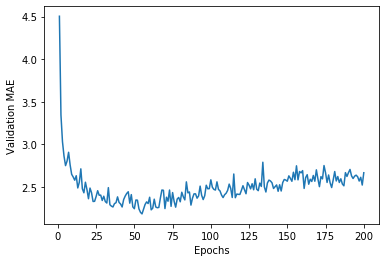

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

#### 指数平滑后的可视化

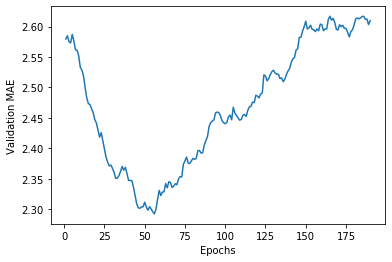

In [28]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
                previous = smoothed_points[-1]
                smoothed_points.append(previous * factor + point * (1 - factor))  # 包含前数据的90%信息
        else:
                smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])  # 删除前10个点
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [29]:
len(smooth_mae_history)

190

In [30]:
np.argmin(smooth_mae_history)  # 记得+10=65个epoch

55

### 重构模型

In [31]:
model = build_model() 
model.fit(train_data, train_targets, epochs=65, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [32]:
test_mae_score

2.707050085067749